In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
from sklearn.datasets import make_circles
n = 1000

X, y = make_circles(n, noise=0.03, random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
import pandas as pd
circles = pd.DataFrame({'X1': X[:, 0],
                       'X2': X[:, 1],
                       'label': y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


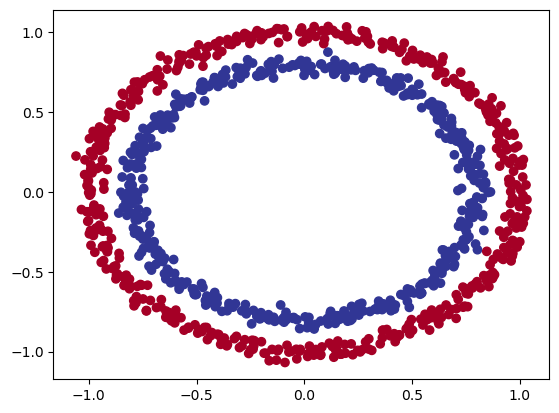

In [6]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
type(X)

numpy.ndarray

In [9]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
len(X_train), len(X_test)

(800, 200)

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [13]:
class CircleModel(nn.Module):
    def __init__(self):
        super(CircleModel, self).__init__()
        self.layer_1 = nn.Linear(2, 4)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.layer_2(self.relu(self.layer_1(x))))

In [14]:
model = CircleModel().to(device=device)
model

CircleModel(
  (layer_1): Linear(in_features=2, out_features=4, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [15]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    #nn.Sigmoid()
).to(device=device)

In [16]:
import torch.optim as optim

In [17]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
def check_accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [19]:
torch.manual_seed(14)
torch.cuda.manual_seed(14)
epochs = 10001
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = check_accuracy(y_train, y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = check_accuracy(y_test, test_pred)

    if epoch % 10 == 0:
        print(f'epoch: {epoch} | loss: {loss} | acc:{acc} | test_loss: {test_loss} | test_acc: {test_acc}')

epoch: 0 | loss: 0.7214323282241821 | acc:50.0 | test_loss: 0.7209794521331787 | test_acc: 50.0
epoch: 10 | loss: 0.7176382541656494 | acc:50.0 | test_loss: 0.7171673774719238 | test_acc: 50.0
epoch: 20 | loss: 0.7142366170883179 | acc:50.0 | test_loss: 0.7139866352081299 | test_acc: 50.0
epoch: 30 | loss: 0.7112451791763306 | acc:50.0 | test_loss: 0.7111576199531555 | test_acc: 50.0
epoch: 40 | loss: 0.7086317539215088 | acc:50.0 | test_loss: 0.7086482048034668 | test_acc: 50.0
epoch: 50 | loss: 0.7063546180725098 | acc:50.0 | test_loss: 0.7064151763916016 | test_acc: 50.0
epoch: 60 | loss: 0.7043585777282715 | acc:50.0 | test_loss: 0.7044552564620972 | test_acc: 50.0
epoch: 70 | loss: 0.7025969624519348 | acc:50.0 | test_loss: 0.7027331590652466 | test_acc: 50.0
epoch: 80 | loss: 0.701046347618103 | acc:50.0 | test_loss: 0.7012318968772888 | test_acc: 50.0
epoch: 90 | loss: 0.6996814012527466 | acc:50.0 | test_loss: 0.6998968720436096 | test_acc: 50.0
epoch: 100 | loss: 0.69848382472

epoch: 220 | loss: 0.6908016204833984 | acc:50.24999999999999 | test_loss: 0.6921391487121582 | test_acc: 45.5
epoch: 230 | loss: 0.6904721856117249 | acc:51.37500000000001 | test_loss: 0.6919286847114563 | test_acc: 48.0
epoch: 240 | loss: 0.6901227831840515 | acc:51.5 | test_loss: 0.6917524933815002 | test_acc: 45.5
epoch: 250 | loss: 0.6897763609886169 | acc:52.625 | test_loss: 0.6915869116783142 | test_acc: 46.5
epoch: 260 | loss: 0.689429759979248 | acc:52.75 | test_loss: 0.6914253234863281 | test_acc: 48.5
epoch: 270 | loss: 0.6890648007392883 | acc:54.125 | test_loss: 0.691245436668396 | test_acc: 50.0
epoch: 280 | loss: 0.6886966228485107 | acc:55.625 | test_loss: 0.691042959690094 | test_acc: 49.0
epoch: 290 | loss: 0.6883314251899719 | acc:56.25 | test_loss: 0.6907882690429688 | test_acc: 49.5
epoch: 300 | loss: 0.6879417896270752 | acc:56.00000000000001 | test_loss: 0.6904827952384949 | test_acc: 52.0
epoch: 310 | loss: 0.687549889087677 | acc:56.125 | test_loss: 0.690197587

In [21]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

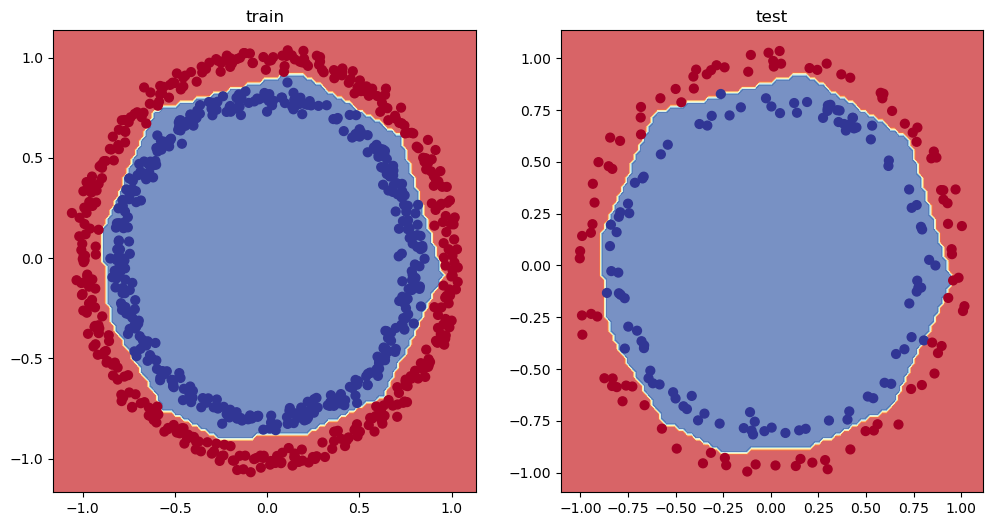

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model, X_test, y_test)